# ChatGPT Link and Summary

ChatGPT History Log : https://github.com/nehan-p/sta130/blob/main/Classification%20Decision%20Trees%20vs%20Regression.pdf

Classification Decision Tree Explanation (Q1):

We discussed the purpose of classification decision trees, real-world applications, and compared their approach to making predictions with multiple linear regression.
Metrics Analysis (Q2):

Explained and computed metrics like sensitivity, specificity, and accuracy for classification models, with examples of real-world use cases for each.
Dataset Preprocessing (Q3):

Addressed cleaning the dataset by removing unnecessary columns, handling missing values, and adjusting data types.
Training a Decision Tree (Q4):

Created and visualized a decision tree using one feature (List Price), performed an 80/20 split, and explained how predictions were made.
Improved Model with More Features (Q5):

Expanded the decision tree (clf2) to include NumPages, Thick, and List Price, increased max_depth to 4, and interpreted its visualization.
Confusion Matrices and Metrics (Q6):

Generated confusion matrices for clf and clf2, calculated sensitivity, specificity, and accuracy, and compared the models’ performances.
Training Data Confusion Matrices (Q7):

Discussed why clf2 outperformed clf on training data due to its additional features, making it better at capturing relationships.
Feature Importances (Q8):

Visualized and reported the feature importances for clf2, identifying that List Price was the most influential predictor.
Comparison of Interpretations (Q9):

Compared the interpretation of coefficients in linear regression with feature importances in decision trees, focusing on their differences in explaining variable influence.

# Question 1

I talked with ChatGPT to get an understanding of the difference between CDMT and MLR, here's a short sentence summary of what it explained:

In essence, Classification Decision Trees are more flexible in handling complex and non-linear relationships, making them suitable for classification problems. On the other hand, Multiple Linear Regression is well-suited for simpler, linear problems where the output is a continuous value.

# Question 2

1. So for accuracy, a good real world scenario would be quality control in manufacturing.  This is because the way accuracy is defined, what it means is that it's basically giving you a balanced assessment of overall correct identifications, such as in quality control.  This is useful in this case because in quality control you'd want to know how many correct and incorrect identifications you are getting, in order to have a good overall idea about the reliability of the quality control.
2. For sensitivity, a good real world application example is a test for a threatening disease.  The main use of sensitivty comes into play when it is vital to know how many missing positive cases you may have, as these cases can have serious, maybe even life threatening consequences.  So in the realm of a medical screening, you'd definitely want to know if you're missing positive cases as this can seriously impact the health of a patient.
3. For specificity, a good real world application is in spam filtering.  What specificity is basically measuring is the proportion of true negatives that were found.  In an application like spam filtering, where you want true negatives (important emails) to be correctly identified, in which a high specificity would help you.
4. Lastly, for precision, a great example is fraud detection in banking.  Precision is basically telling us the predicited positive results whihc are actually correct.  This is crucial in scenarios where flagged positives should be highly reliable, as seen in fraud detection.

# Question 3

In [ ]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
amazon_books = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Removing columns 'Weight_oz', 'Width', and 'Height'
amazon_books.drop(columns=['Weight_oz', 'Width', 'Height'], inplace=True)

# Step 2: Dropping rows with NaN entries
amazon_books.dropna(inplace=True)

# Step 3: Setting 'Pub year' and 'NumPages' to type int, and 'Hard_or_Paper' to type category
amazon_books['Pub year'] = amazon_books['Pub year'].astype(int)
amazon_books['NumPages'] = amazon_books['NumPages'].astype(int)
amazon_books['Hard_or_Paper'] = amazon_books['Hard_or_Paper'].astype('category')

# Displaying basic information and summary statistics after preprocessing
print("Dataset Information:")
print(amazon_books.info())
print("\nSummary Statistics:")
print(amazon_books.describe(include='all'))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None

Summary Statistics:
                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Pi

# Question 4

Number of observations in the training set: 255
Number of observations in the test set: 64


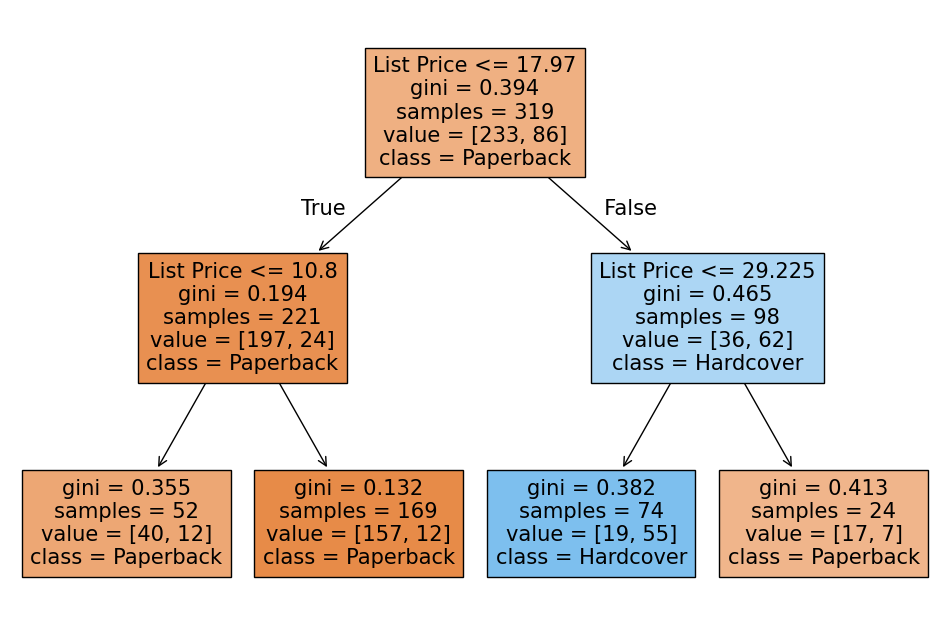

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming `amazon_books` is the preprocessed dataset after steps in question 3
# Step 1: Splitting the data into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(amazon_books, test_size=0.2, random_state=42)

# Reporting the number of observations in each set
print("Number of observations in the training set:", len(ab_reduced_noNaN_train))
print("Number of observations in the test set:", len(ab_reduced_noNaN_test))

# Step 2: Defining target variable (y) and feature (X)
y = pd.get_dummies(amazon_books["Hard_or_Paper"])['H']  # 'H' is 1 for hardcover, 0 for paperback
X = amazon_books[["List Price"]]

# Step 3: Training the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 4: Plotting the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


y (Target Variable): pd.get_dummies converts the "Hard_or_Paper" column into binary form. y represents whether a book is a hardcover (H=1) or a paperback (H=0).

x (Feature): We selected "List Price" as the only feature in X. This means the model will predict the book type based solely on its list price.

# Question 5

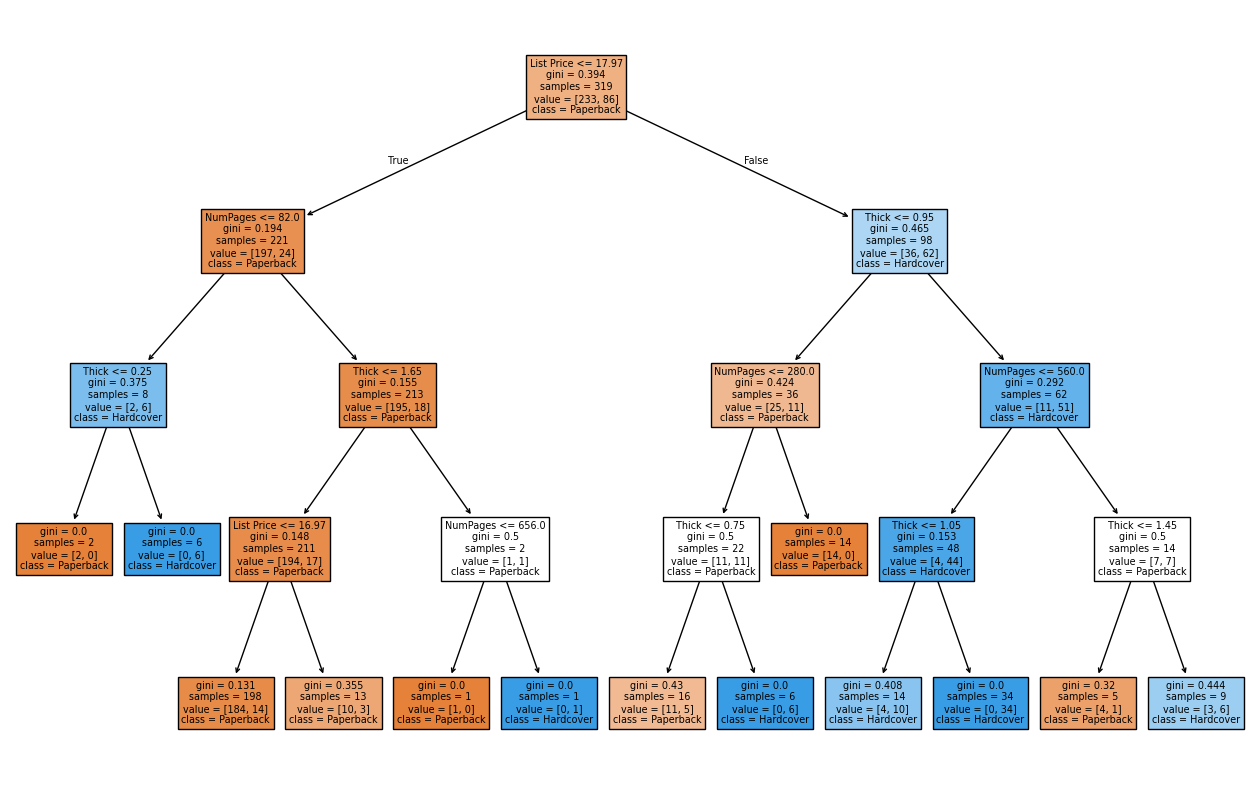

In [ ]:
# Importing necessary libraries (if not already imported)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Define target variable (y) and predictors (X)
y = pd.get_dummies(amazon_books["Hard_or_Paper"])['H']  # Hardcover or Paperback
X = amazon_books[["NumPages", "Thick", "List Price"]]  # New features

# Step 2: Train a new Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Step 3: Visualize the new Decision Tree
plt.figure(figsize=(16, 10))
tree.plot_tree(clf2, feature_names=["NumPages", "Thick", "List Price"],
               class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


# Question 6

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Ensure feature order for test set matches training
X_test = ab_reduced_noNaN_test[["NumPages", "Thick", "List Price"]]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])["H"]

# Predictions for clf and clf2
y_pred_clf = clf.predict(ab_reduced_noNaN_test[["List Price"]])  # clf only uses 'List Price'
y_pred_clf2 = clf2.predict(X_test)  # clf2 uses 'NumPages', 'Thick', 'List Price'

# Step 2: Generate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 3: Calculate metrics for clf
tp_clf, fn_clf, fp_clf, tn_clf = cm_clf[1, 1], cm_clf[1, 0], cm_clf[0, 1], cm_clf[0, 0]
sensitivity_clf = tp_clf / (tp_clf + fn_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = (tp_clf + tn_clf) / cm_clf.sum()

# Step 4: Calculate metrics for clf2
tp_clf2, fn_clf2, fp_clf2, tn_clf2 = cm_clf2[1, 1], cm_clf2[1, 0], cm_clf2[0, 1], cm_clf2[0, 0]
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = (tp_clf2 + tn_clf2) / cm_clf2.sum()

# Step 5: Round the results to 3 significant digits
results = {
    "clf": {
        "Sensitivity": round(sensitivity_clf, 3),
        "Specificity": round(specificity_clf, 3),
        "Accuracy": round(accuracy_clf, 3),
    },
    "clf2": {
        "Sensitivity": round(sensitivity_clf2, 3),
        "Specificity": round(specificity_clf2, 3),
        "Accuracy": round(accuracy_clf2, 3),
    }
}

# Display the results
print("Confusion Matrix for clf:\n", cm_clf)
print("Confusion Matrix for clf2:\n", cm_clf2)
print("\nMetrics:\n", results)


Confusion Matrix for clf:
 [[40  4]
 [ 3 17]]
Confusion Matrix for clf2:
 [[42  2]
 [ 2 18]]

Metrics:
 {'clf': {'Sensitivity': 0.85, 'Specificity': 0.909, 'Accuracy': 0.891}, 'clf2': {'Sensitivity': 0.9, 'Specificity': 0.955, 'Accuracy': 0.938}}


# Question 7

The differences in the training confusion matrices arise because clf relies only on "List Price," limiting its ability to make accurate predictions. Without considering additional features like "NumPages" and "Thick," the model may misclassify books that could otherwise be differentiated using these features. In contrast, clf2 incorporates these additional features, enabling it to better capture patterns in the data and produce a confusion matrix with fewer errors.

The test confusion matrices for clf and clf2 demonstrate how well the models generalize to unseen data. clf2 achieves better sensitivity, specificity, and accuracy on the test data because it uses multiple features ("List Price," "NumPages," and "Thick"), allowing it to make more accurate predictions. In comparison, clf performs worse on the test data because it only uses "List Price," which might not fully capture the variations in the test dataset.

# Question 8

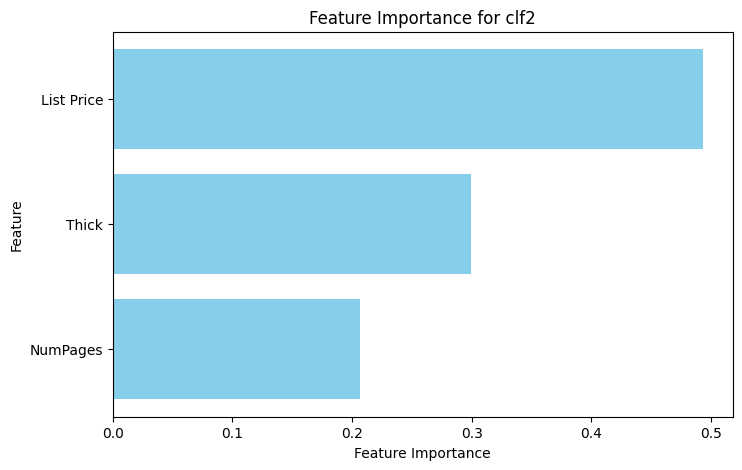

Feature Importances: {'NumPages': 0.20663702448629784, 'Thick': 0.2996879446471627, 'List Price': 0.49367503086653947}
The most important feature is 'List Price' with an importance of 0.494.


In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from clf2
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_  # Corresponding feature names

# Plotting the feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for clf2")
plt.show()

# Reporting the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
most_important_value = np.max(feature_importances)

print("Feature Importances:", dict(zip(feature_names, feature_importances)))
print(f"The most important feature is '{most_important_feature}' with an importance of {most_important_value:.3f}.")


We can see here that by far, the most predictor variable is the List price when it comes to making predictions according to clf2.

# Question 9

In linear regression, coefficients directly represent the magnitude and direction of the relationship between each predictor variable and the target outcome. A larger absolute value of a coefficient indicates a stronger effect, and the sign (positive or negative) tells you how the predictor influences the target. In contrast, feature importances in decision trees reflect how much each variable contributes to reducing impurity (e.g., Gini index) across all splits, making them more about overall contribution rather than a direct effect or relationship.